In [1]:
import pandas as pd
from visualization import *
from data_loader import data_loader

In [2]:
data = data_loader(num=10000)

Loading data...
processed_data.csv does not exist. Loading data from original file.


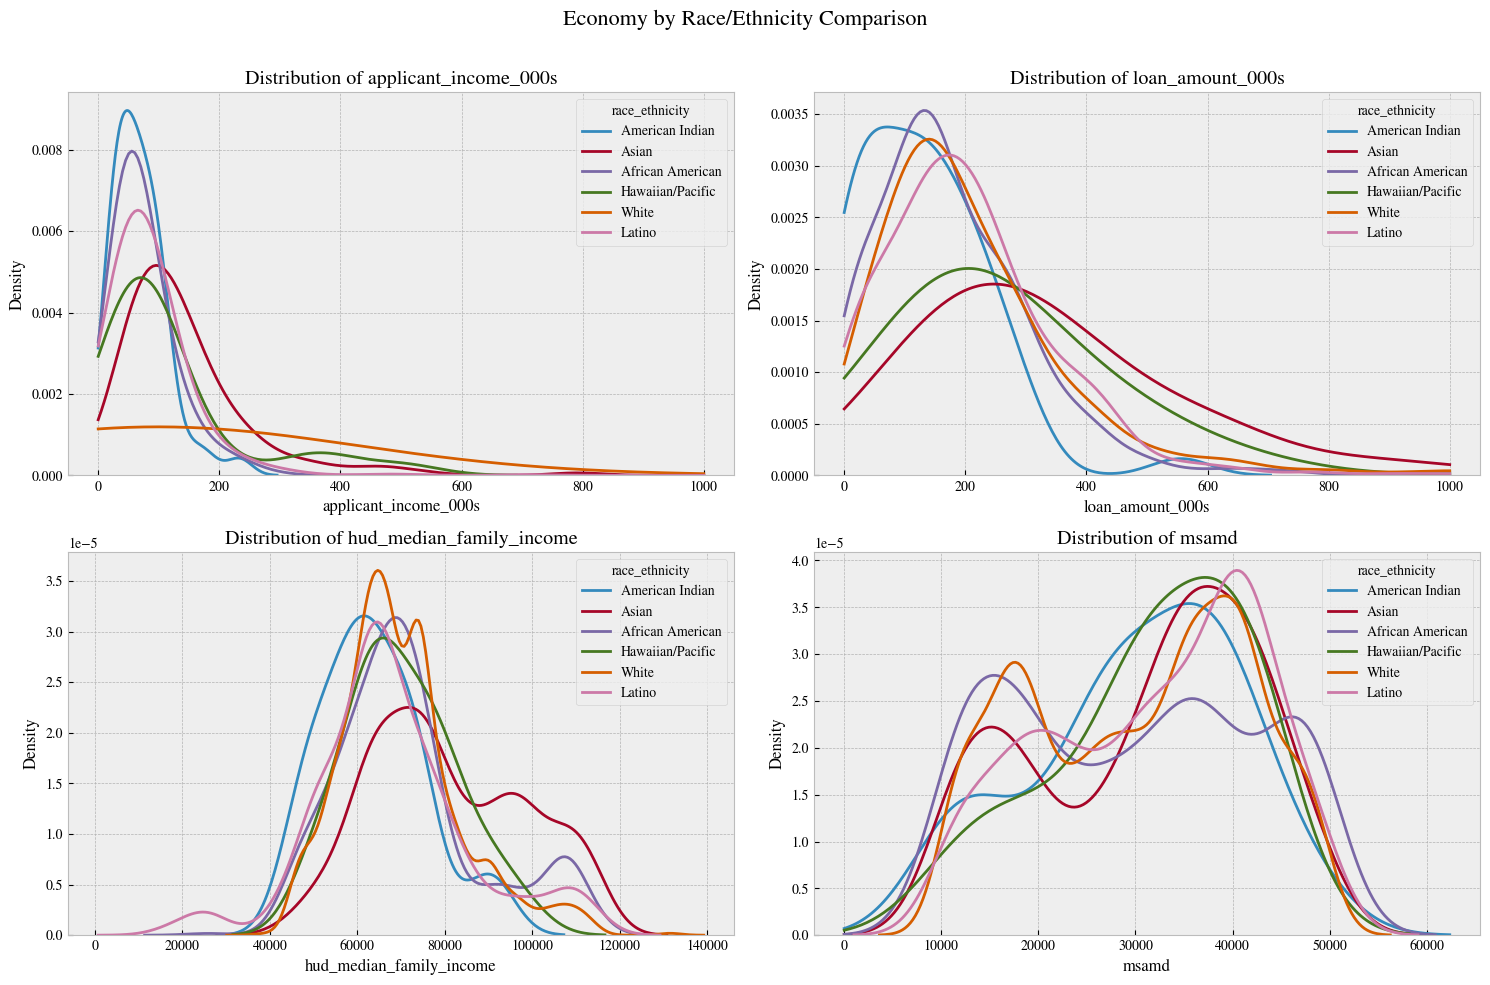

In [3]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'msamd']

plot_density_differences(data, "race_ethnicity", groups, group_labels, features, title="Economy by Race/Ethnicity Comparison")

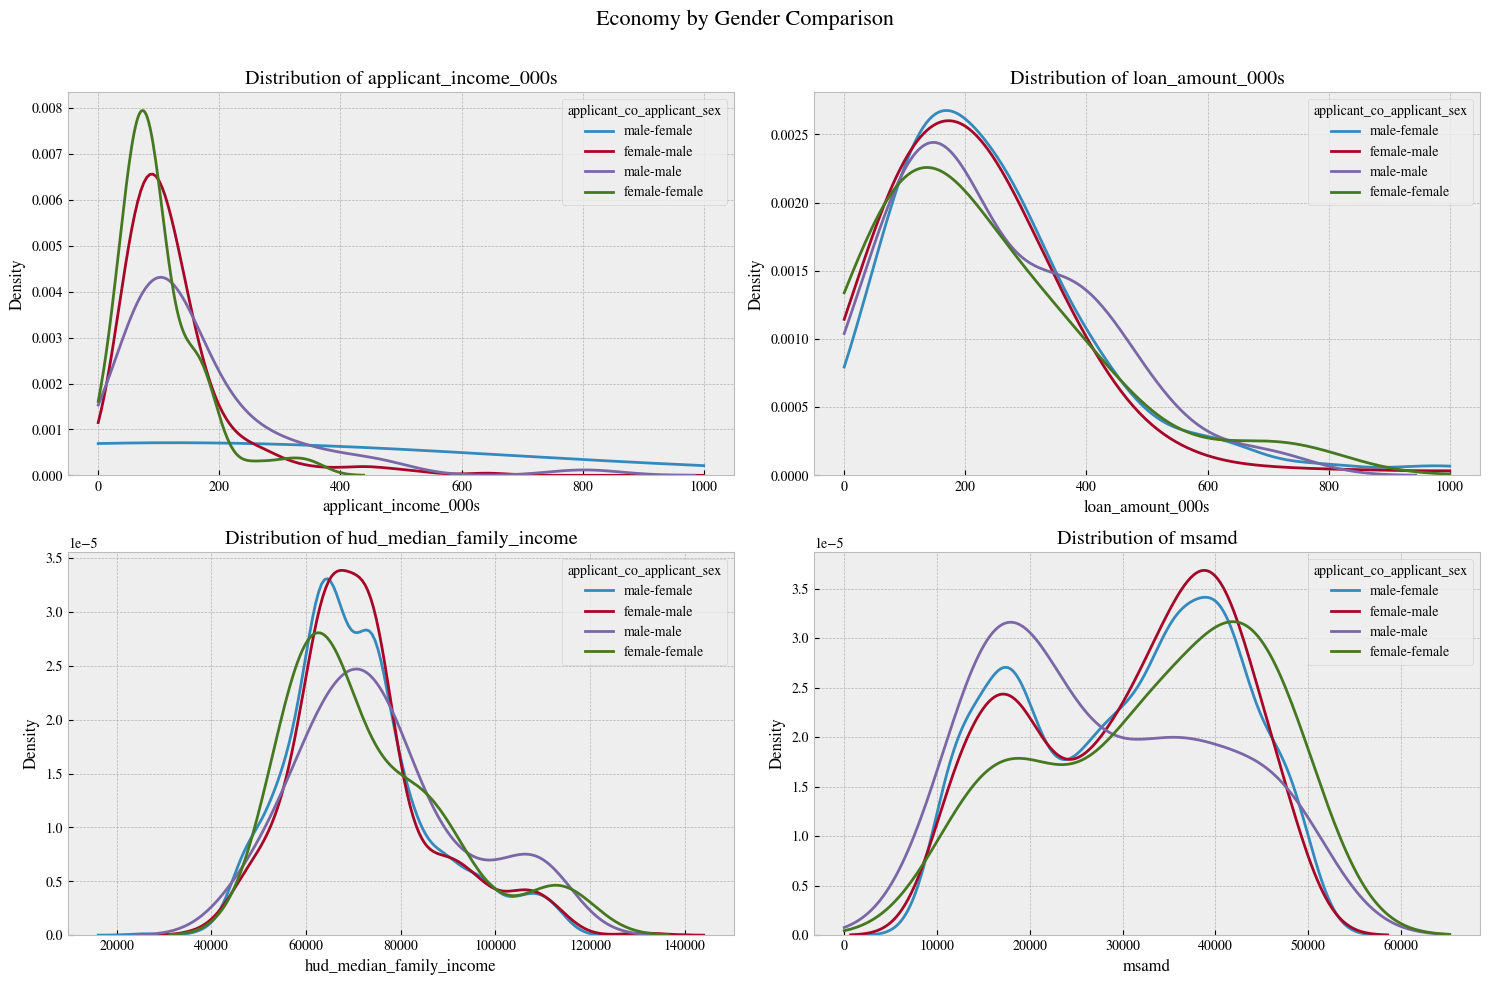

In [4]:
groups = ['1_2', '2_1', '1_1', '2_2']
group_labels = ["male-female", "female-male", "male-male", "female-female"]
features = ['applicant_income_000s', 'loan_amount_000s', 'hud_median_family_income', 'msamd']

plot_density_differences(data, "applicant_co_applicant_sex", groups, group_labels, features, title="Economy by Gender Comparison")

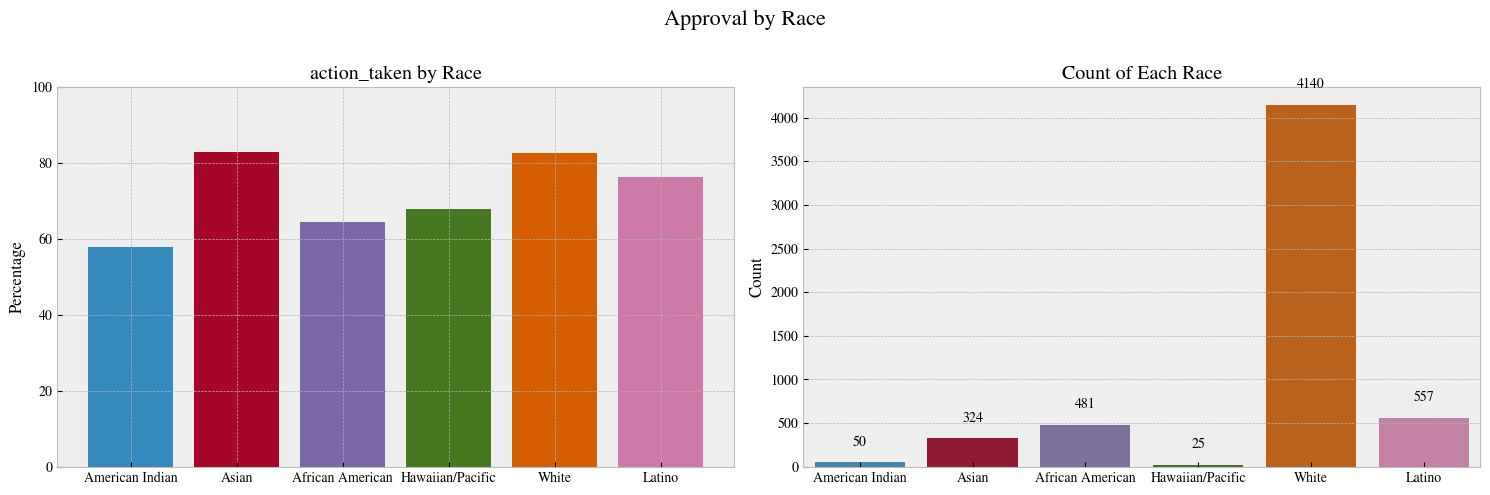

In [5]:
groups = [1, 2, 3, 4, 5, 9]
group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]
features = ['action_taken']

plot_histogram_differences(data, 'race_ethnicity', 'action_taken', groups, group_labels, features, title='Approval by Race')

<Figure size 1200x800 with 0 Axes>

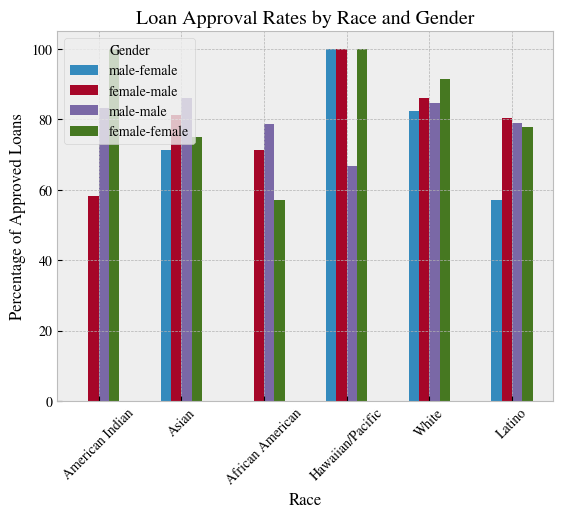

In [6]:
approval_rates(data)

In [7]:
def approval_rates(data):
    group_labels = ["American Indian", "Asian", "African American", "Hawaiian/Pacific", "White", "Latino"]

    data = data[data.applicant_co_applicant_sex.isin(['1_2', '2_1', '1_1', '2_2'])]
    data = data[data.race_ethnicity.isin([1, 2, 3, 4, 5, 9])]
    data['approved'] = [1 if x == 'Approved' else 0 for x in data['action_taken']]

    fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(16, 5))

    for i, group in enumerate(['low', 'middle', 'high']):
        subset = data[data.income_group == group]
        approval_rate = subset.groupby(['race_ethnicity', 'applicant_co_applicant_sex'])['approved'].mean() * 100

        ax = axes[i]
        approval_rate.unstack().plot(kind='bar', position=.5, width=0.5, ax=ax)

        ax.set_title(f'Loan Approval Rates for {group.capitalize()} Income Group')
        ax.set_xlabel('Race')
        ax.set_xticklabels(group_labels, rotation=45)
        ax.set_ylabel('Percentage of Approved Loans')

        ax.legend(title='Gender', loc='upper left', labels=["male-female", "female-male", "male-male", "female-female"])

    plt.tight_layout()
    plt.show()

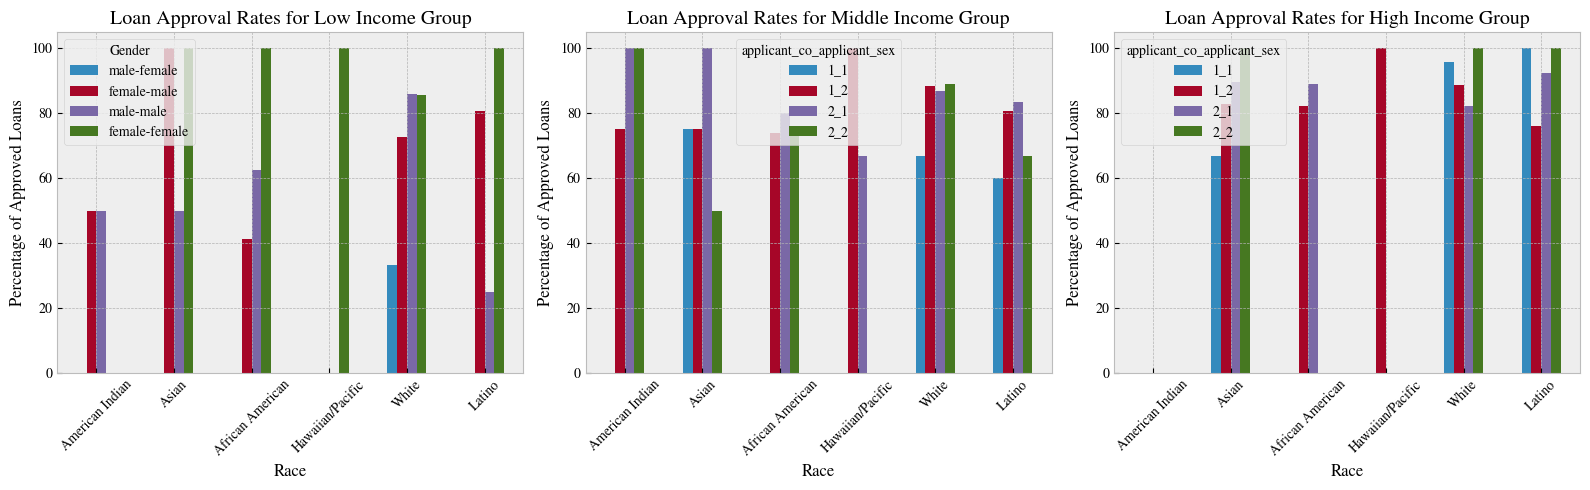

In [8]:
approval_rates(data)